In [1]:
import os
os.environ["PYSPARK_PYTHON"] = "python"

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean,stddev, min , max, count
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [ ]:
# Create Spark session
spark = SparkSession.builder.appName("Anscombe").getOrCreate()

In [4]:
anscombe_data = [
    (10.0, 8.04, 10.0, 9.14, 10.0, 7.46,  8.0, 6.58),
    ( 8.0, 6.95,  8.0, 8.14,  8.0, 6.77,  8.0, 5.76),
    (13.0, 7.58, 13.0, 8.74, 13.0,12.74,  8.0, 7.71),
    ( 9.0, 8.81,  9.0, 8.77,  9.0, 7.11,  8.0, 8.84),
    (11.0, 8.33, 11.0, 9.26, 11.0, 7.81,  8.0, 8.47),
    (14.0, 9.96, 14.0, 8.10, 14.0, 8.84,  8.0, 7.04),
    ( 6.0, 7.24,  6.0, 6.13,  6.0, 6.08,  8.0, 5.25),
    ( 4.0, 4.26,  4.0, 3.10,  4.0, 5.39, 19.0,12.50),
    (12.0,10.84, 12.0, 9.13, 12.0, 8.15,  8.0, 5.56),
    ( 7.0, 4.82,  7.0, 7.26,  7.0, 6.42,  8.0, 7.91),
    ( 5.0, 5.68,  5.0, 4.74,  5.0, 5.73,  8.0, 6.89)
]


In [5]:
# Column names
columns = ["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]

# Create DataFrame
anscombe_df = spark.createDataFrame(anscombe_data, columns)

# Show DataFrame
anscombe_df.show()


+----+-----+----+----+----+-----+----+----+
|  x1|   y1|  x2|  y2|  x3|   y3|  x4|  y4|
+----+-----+----+----+----+-----+----+----+
|10.0| 8.04|10.0|9.14|10.0| 7.46| 8.0|6.58|
| 8.0| 6.95| 8.0|8.14| 8.0| 6.77| 8.0|5.76|
|13.0| 7.58|13.0|8.74|13.0|12.74| 8.0|7.71|
| 9.0| 8.81| 9.0|8.77| 9.0| 7.11| 8.0|8.84|
|11.0| 8.33|11.0|9.26|11.0| 7.81| 8.0|8.47|
|14.0| 9.96|14.0| 8.1|14.0| 8.84| 8.0|7.04|
| 6.0| 7.24| 6.0|6.13| 6.0| 6.08| 8.0|5.25|
| 4.0| 4.26| 4.0| 3.1| 4.0| 5.39|19.0|12.5|
|12.0|10.84|12.0|9.13|12.0| 8.15| 8.0|5.56|
| 7.0| 4.82| 7.0|7.26| 7.0| 6.42| 8.0|7.91|
| 5.0| 5.68| 5.0|4.74| 5.0| 5.73| 8.0|6.89|
+----+-----+----+----+----+-----+----+----+



In [6]:
dataset1 = anscombe_df.select("x1","y1")
dataset1.show()

+----+-----+
|  x1|   y1|
+----+-----+
|10.0| 8.04|
| 8.0| 6.95|
|13.0| 7.58|
| 9.0| 8.81|
|11.0| 8.33|
|14.0| 9.96|
| 6.0| 7.24|
| 4.0| 4.26|
|12.0|10.84|
| 7.0| 4.82|
| 5.0| 5.68|
+----+-----+



In [7]:
summary = dataset1.select(mean("x1"), stddev("x1"), mean("y1"), stddev("y1"))
summary.show()

+-------+------------------+-----------------+-----------------+
|avg(x1)|        stddev(x1)|          avg(y1)|       stddev(y1)|
+-------+------------------+-----------------+-----------------+
|    9.0|3.3166247903553994|7.500909090909093|2.031568135925815|
+-------+------------------+-----------------+-----------------+



In [8]:
dataset1_pd = dataset1.toPandas()
dataset1_pd.describe()

,x1,y1
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [9]:
correlation_xy = np.corrcoef(dataset1_pd['x1'], dataset1_pd['y1'])

print("Correlation between x1 and y1:", correlation_xy)

Correlation between x1 and y1: [[1.         0.81642052]
 [0.81642052 1.        ]]


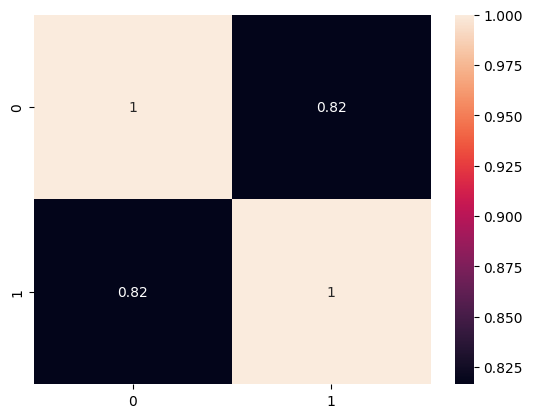

In [ ]:
import seaborn as sns
sns.heatmap(correlation_xy, annot=True)
plt.show()

In [11]:


correlation = correlation_xy[0,1]
correlation

np.float64(0.81642051634484)

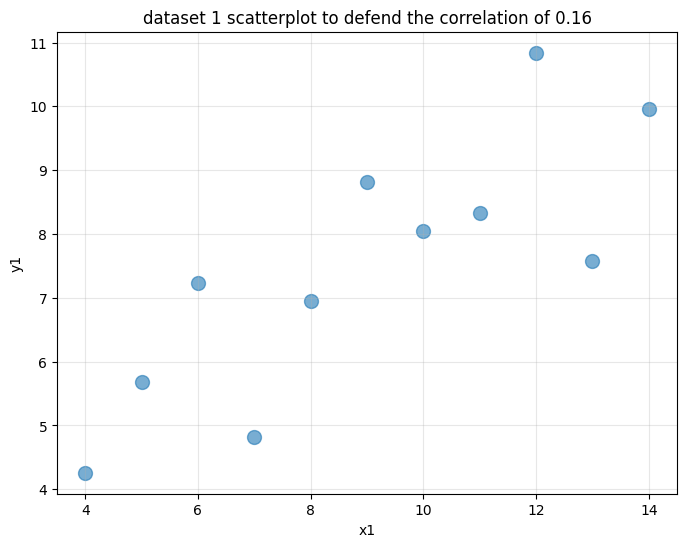

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(dataset1_pd['x1'], dataset1_pd['y1'], alpha=0.6, s= 100)

plt.xlabel("x1")
plt.ylabel("y1")
plt.title("dataset 1 scatterplot to defend the correlation of 0.16")
plt.grid(True, alpha = 0.3)
plt.show()

In [13]:
dataset2 = anscombe_df.select("x2","y2")
dataset2.show()

+----+----+
|  x2|  y2|
+----+----+
|10.0|9.14|
| 8.0|8.14|
|13.0|8.74|
| 9.0|8.77|
|11.0|9.26|
|14.0| 8.1|
| 6.0|6.13|
| 4.0| 3.1|
|12.0|9.13|
| 7.0|7.26|
| 5.0|4.74|
+----+----+



In [14]:
summary = dataset2.select(mean("x2"), stddev("x2"), mean("y2"), stddev("y2"))
summary.show()

+-------+------------------+-----------------+-----------------+
|avg(x2)|        stddev(x2)|          avg(y2)|       stddev(y2)|
+-------+------------------+-----------------+-----------------+
|    9.0|3.3166247903553994|7.500909090909091|2.031656735501618|
+-------+------------------+-----------------+-----------------+



In [15]:
dataset2_pd = dataset2.toPandas()
dataset2_pd.describe()

,x2,y2
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [16]:

correlation_xy2 = np.corrcoef(dataset2_pd['x2'], dataset2_pd['y2'])

print("Correlation between x2 and y2:", correlation_xy2)

correlation = correlation_xy2[0,1]
correlation

Correlation between x2 and y2: [[1.         0.81623651]
 [0.81623651 1.        ]]


np.float64(0.8162365060002428)

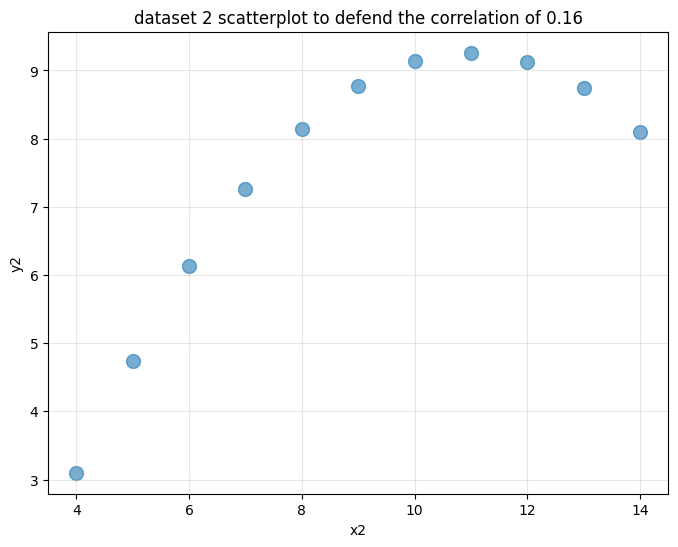

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(dataset2_pd['x2'], dataset2_pd['y2'], alpha=0.6, s= 100)

plt.xlabel("x2")
plt.ylabel("y2")
plt.title("dataset 2 scatterplot to defend the correlation of 0.16")
plt.grid(True, alpha = 0.3)
plt.show()

In [18]:
dataset3 = anscombe_df.select("x3","y3")
dataset3.show()

+----+-----+
|  x3|   y3|
+----+-----+
|10.0| 7.46|
| 8.0| 6.77|
|13.0|12.74|
| 9.0| 7.11|
|11.0| 7.81|
|14.0| 8.84|
| 6.0| 6.08|
| 4.0| 5.39|
|12.0| 8.15|
| 7.0| 6.42|
| 5.0| 5.73|
+----+-----+



In [19]:
summary = dataset3.select(mean("x3"), stddev("x3"), mean("y3"), stddev("y3"))
summary.show()

+-------+------------------+-----------------+-----------------+
|avg(x3)|        stddev(x3)|          avg(y3)|       stddev(y3)|
+-------+------------------+-----------------+-----------------+
|    9.0|3.3166247903553994|7.500000000000001|2.030423601123667|
+-------+------------------+-----------------+-----------------+



In [20]:
dataset3_pd = dataset3.toPandas()
dataset3_pd.describe()

,x3,y3
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [21]:

correlation_xy3 = np.corrcoef(dataset3_pd['x3'], dataset3_pd['y3'])

print("Correlation between x3 and y3:", correlation_xy3)

correlation = correlation_xy3[0,1]
correlation

Correlation between x3 and y3: [[1.         0.81628674]
 [0.81628674 1.        ]]


np.float64(0.8162867394895984)

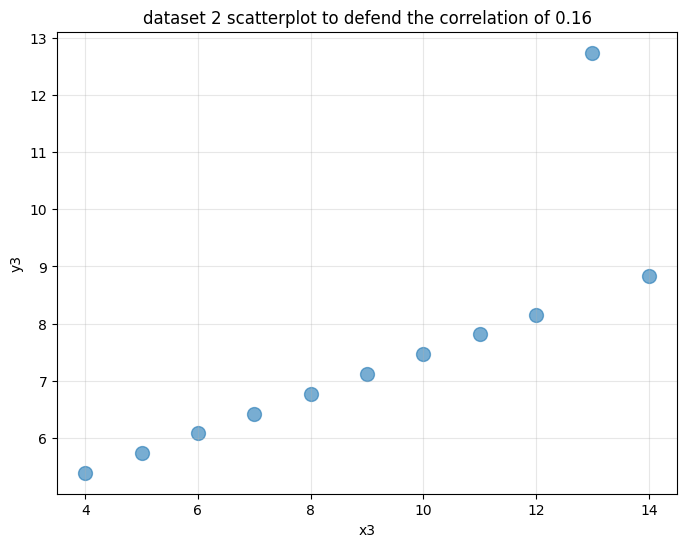

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(dataset3_pd['x3'], dataset3_pd['y3'], alpha=0.6, s= 100)

plt.xlabel("x3")
plt.ylabel("y3")
plt.title("dataset 2 scatterplot to defend the correlation of 0.16")
plt.grid(True, alpha = 0.3)
plt.show()

In [23]:
dataset4 = anscombe_df.select("x4","y4")
dataset4.show()

+----+----+
|  x4|  y4|
+----+----+
| 8.0|6.58|
| 8.0|5.76|
| 8.0|7.71|
| 8.0|8.84|
| 8.0|8.47|
| 8.0|7.04|
| 8.0|5.25|
|19.0|12.5|
| 8.0|5.56|
| 8.0|7.91|
| 8.0|6.89|
+----+----+



In [24]:
summary = dataset4.select(mean("x4"), stddev("x4"), mean("y4"), stddev("y4"))
summary.show()

+-------+---------------+----------------+------------------+
|avg(x4)|     stddev(x4)|         avg(y4)|        stddev(y4)|
+-------+---------------+----------------+------------------+
|    9.0|3.3166247903554|7.50090909090909|2.0305785113876023|
+-------+---------------+----------------+------------------+



In [25]:
dataset4_pd = dataset4.toPandas()
dataset4_pd.describe()

,x4,y4
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


In [26]:

correlation_xy4 = np.corrcoef(dataset4_pd['x4'], dataset4_pd['y4'])

print("Correlation between x4 and y4:", correlation_xy4)

correlation = correlation_xy2[0,1]
correlation

Correlation between x4 and y4: [[1.         0.81652144]
 [0.81652144 1.        ]]


np.float64(0.8162365060002428)

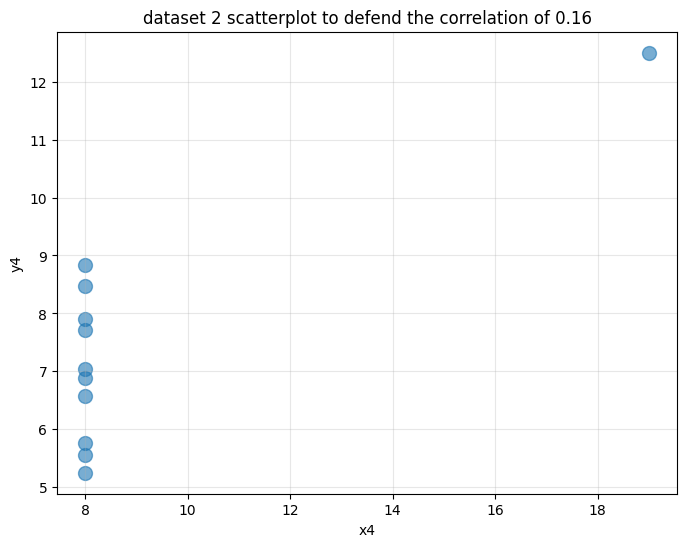

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(dataset4_pd['x4'], dataset4_pd['y4'], alpha=0.6, s= 100)

plt.xlabel("x4")
plt.ylabel("y4")
plt.title("dataset 2 scatterplot to defend the correlation of 0.16")
plt.grid(True, alpha = 0.3)
plt.show()